# CIS6800: Project 1a: Deep Learning Basics Part A

### Instructions:
* This is an individual assignment. Collaborating with others is not permitted.
* There is no single answer to most problems in deep learning, therefore the questions will often be underspecified. You need to fill in the blanks and submit a solution that solves the (practical) problem. Document the choices (hyperparameters, features, neural network architectures, etc.) you made where specified.
* All the code should be written in Python. You should only use PyTorch to complete this project.
* You are encouraged to use ChatGPT, but you need to make a summary of how you used it, and the code that you have copied from it.


### Setup

In [1]:
import torch
from torch import nn
import torchvision
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torchvision import transforms, utils
import torch.optim as optim

import numpy as np
from matplotlib import cm

"""
%matplotlib inline
rng_seed = 45510

# Download MNIST
torchvision.datasets.MNIST('.', download=True)
"""

100%|██████████| 9912422/9912422 [00:00<00:00, 197006739.31it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 95683802.39it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 82085783.09it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21073593.77it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train

## Plot Loss and Gradient (20%)
In this part, you will write code to plot the output and gradient for a single neuron with
Sigmoid activation and two different loss functions. As shown in Figure 1, You should
implement a single neuron with input 1, and calculate different losses and corresponding
error.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig1.png" width=1200/></div>

<center>Figure 1: Network diagram for part 1.</center>

All the figures plotted in this part should have the same range of x-axis and y-axis. The
range should be centered at 0 but the extend should be picked so as to see the difference
clearly.

A set of example plots are provided in Figure 2. Here we use ReLU (instead of Sigmoid)
activation and L2 loss as an example.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig2.png" width=800/></div>

<center>Figure 2: Example plots with ReLU activation and L2 loss. Left: Output of ReLU function.
Middle: Loss plot with L2 loss. Right: Gradient plot.</center>

1. (3%) Plot a 3D figure showing the relations of output of Sigmoid function and weight/bias. To be specific, x-axis is weight, y-axis is bias, and z-axis is the out-put.

 Hint: Use the Python package matplotlib and the function plot surface from mpl toolkits.mplot3d
to draw 3D figures.

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


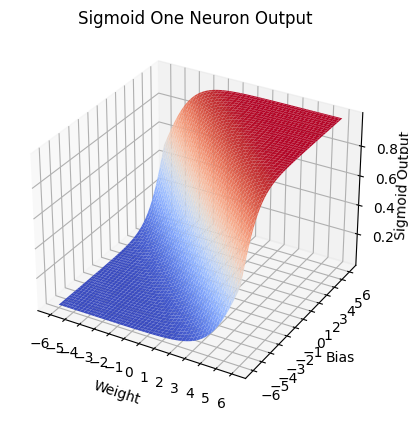

In [2]:
"""
weights = torch.linspace(-6,6,100)
biases = torch.linspace(-6,6,100)

w,b = torch.meshgrid(weights,biases)

#since x = 1
output = 1/(1+torch.exp(-(w+b)))


fig = plt.figure(10)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X = w,Y = b, Z= output,cmap = 'coolwarm')

ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Sigmoid Output",labelpad = -1.5)
ax.set_title('Sigmoid One Neuron Output')

ax.set_xticks(range(-6, 7))
ax.set_yticks(range(-6, 7))

plt.show()
"""

2. (3%) Experiment with L2 loss. The L2 loss is defined as $\mathcal{L}_{L2} = (\hat{y} - y)^2$, where $y$ is
the ground truth and $\hat{y}$ is the prediction. Let $y = 0.5$ and plot a 3D figure showing
2 the relations of L2 loss and weight/bias. To be specific, the x-axis is weight, y-axis is
bias, and z-axis is the L2 loss.

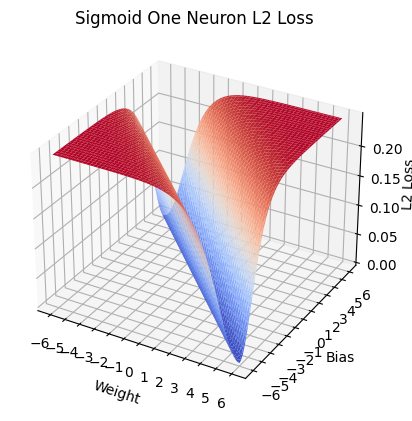

In [3]:
"""
weights = torch.linspace(-6,6,100)
biases = torch.linspace(-6,6,100)

w,b = torch.meshgrid(weights,biases)
"""
def l2_loss(y_actual,y_pred):
  return (y_pred - y_actual)**2
"""
#since x = 1
output = 1/(1+torch.exp(-(w+b)))

loss = l2_loss(output,0.5)

fig = plt.figure(10)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X = w,Y = b, Z= loss,cmap = 'coolwarm')

ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("L2 Loss",labelpad = 1.3)
ax.set_title('Sigmoid One Neuron L2 Loss')

ax.set_xticks(range(-6, 7))
ax.set_yticks(range(-6, 7))

plt.show()
"""

In [4]:
"""
loss.sum()
"""

tensor(1769.3123)

3. (4%) Experiment with back-propagation with L2 loss. Compute $\frac{\partial \mathcal{L}_{L2}}{\partial \text{weight}}$ and plot a 3D figure showing the relations of gradient and weight/bias. To be specific, the x-axis is weight, y-axis is bias, and z-axis is the gradient w.r.t. weight.

In [ ]:
#Loss = (ypred - yactual)**2
#Loss = (sigmoid(w+b) - yactual)**2
# dL/dw = (2* (sigmoid(w+b) - y_actual)) * sigmoid(w+b) * (1-sigmoid(w+b))

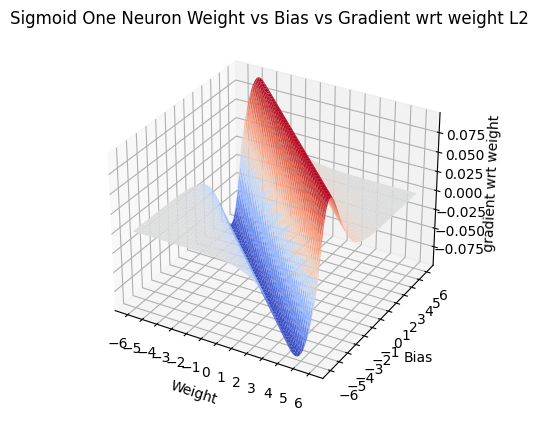

In [5]:
"""
weights = torch.linspace(-6,6,100)
biases = torch.linspace(-6,6,100)

w,b = torch.meshgrid(weights,biases)

#since x = 1
output = 1/(1+torch.exp(-(w+b)))

gradient = 2* (output - 0.5)  * output * (1-output)


fig = plt.figure(10)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X = w,Y = b, Z= gradient,cmap = 'coolwarm')

ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("gradient wrt weight",labelpad = 4)
ax.set_title('Sigmoid One Neuron Weight vs Bias vs Gradient wrt weight L2 ')

ax.set_xticks(range(-6, 7))
ax.set_yticks(range(-6, 7))

plt.show()
"""

4. (3%) Experiment with cross-entropy loss. The cross-entropy loss is defined as $\mathcal{L}_{CE} = -(y \log{\hat{y}} + (1 - y)\log{(1 - \hat{y})})$, where $y$ is the ground truth probability and $\hat{y}$ is the
predicted probability. Let $y = 0.5$ and plot a 3D figure showing the relations of
cross-entropy loss and weight/bias. To be specific, the x-axis is weight, y-axis is bias,
and z-axis is the cross-entropy loss.

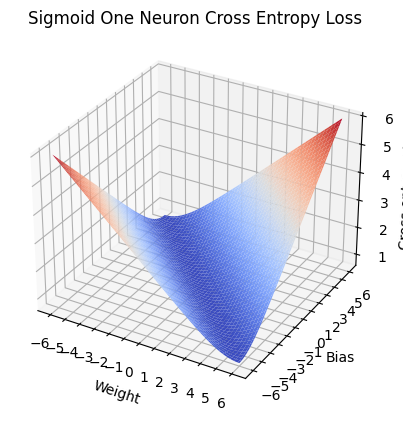

In [6]:
"""
weights = torch.linspace(-6,6,100)
biases = torch.linspace(-6,6,100)

w,b = torch.meshgrid(weights,biases)
"""
def sigmoid(w,b):
  return 1/(1+torch.exp(-(w+b)))

def cross_entropy_loss(y_actual,y_pred):
  return -(y_actual* np.log(y_pred) + (1-y_actual)*np.log(1-y_pred))
"""
#since x = 1
output = sigmoid(w,b)
ce_loss = cross_entropy_loss(torch.tensor(0.5),output)


fig = plt.figure(12)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X = w,Y = b, Z= ce_loss,cmap = 'coolwarm')

ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Cross entropy Loss",labelpad = 0.5)
ax.set_title('Sigmoid One Neuron Cross Entropy Loss')

ax.set_xticks(range(-6, 7))
ax.set_yticks(range(-6, 7))

plt.show()
"""

In [7]:
"""
ce_loss.sum()
"""

tensor(21435.4570)

5. (4%) Experiment with back-propagation with cross-entropy loss. Compute $\frac{\partial \mathcal{L}_{CE}}{\partial \text{weight}}$ and plot a 3D figure showing the relations of gradient and weight/bias. To be specific, the x-axis is weight, y-axis is bias, and z-axis is the gradient w.r.t. weight.

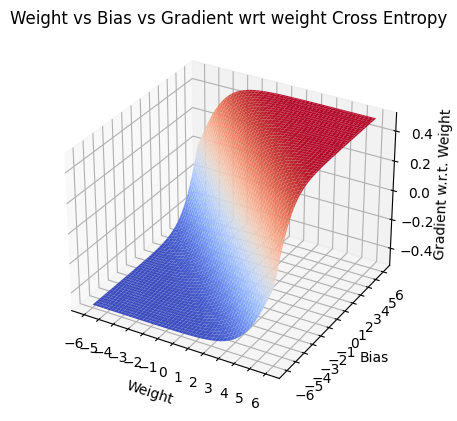

In [8]:
"""
weights = torch.linspace(-6,6,100)
biases = torch.linspace(-6,6,100)

w,b = torch.meshgrid(weights,biases)
"""
def sigmoid(w,b):
  return 1/(1+torch.exp(-(w+b)))

"""
#since x = 1
output = sigmoid(w,b)

#grad =  (y^-y)
grad = (output - 0.5)

fig = plt.figure(10)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X = w,Y = b, Z= grad,cmap = 'coolwarm')

ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Gradient w.r.t. Weight",labelpad = 1.3)
ax.set_title('Weight vs Bias vs Gradient wrt weight Cross Entropy')

ax.set_xticks(range(-6, 7))
ax.set_yticks(range(-6, 7))

plt.show()
"""

6.1 :  
* Visually, the plots of L2 loss and cross entropy loss look very similar for a binary classsification task.This is because both of them work on similar principle that the loss will be steepest when the prediction is far from actual. While L2 loss look for difference in the value, cross entropy loss look for difference in the probability distributions

* One major difference is that L2 loss is symmetric (presence of whole square term) while cross entropy loss isn't. Cross entropy loss depends on which of predicted and actual value were larger

* Another major difference is that while L2 loss can reach zero when prediction == actual, cross entropy loss can approach zero but not be equal to zero

* The magnitude of cross entropy large is much larger than L2 loss which indicates that L2 loss peaks very fast

6.2 : The gradients of cross entropy loss are much larger in magnitude compared to L2 loss. The gradient plot is again symmetric in case of L2 just like the loss was symmetric.<br>

6.3 : Since gradients of L2 loss are small, network might not learn much if predictions are far away from truth as gradient updates are small. This is not the case in cross entropy loss. Also it will take long time for model to reach minima with L2 loss. Thus, we can say cross entropy loss is better with sigmoid for overall learning.



## Solving XOR with a 2-layer Perceptron (20%)
In this question you are asked to build and visualize a 2-layer perceptron that computes
the XOR function. The network architecture is shown in Figure 3. The MLP has 1 hidden
layer with 2 neurons. The activation function used for the hidden layer is the hyperbolic
tangent function. Since we aim to model a boolean function the output of the last layer is
passed through a sigmoid activation function to constrain it between 0 and 1.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig3.png" width=800/></div>

<center>Figure 3: Graphical representation of the 2-layer Perceptron</center>

1. (5%) Formulate the XOR approximation as an optimization problem using the cross
entropy loss. _Hint: Your dataset consists of just 4 points, $x_1 = (0,0)$, $x_2 = (0,1)$,
$x_3 = (1,0)$ and $x_4 = (1,1)$ with ground truth labels 0, 1, 1 and 0 respectively._

We have to frame XOR optimization problem using 2 layer perceptron

1. **Inputs** <br>
  x1=(0,0) ,  x2=(0,1) ,  x3=(1,0)  and  x4=(1,1)  
  y1 = 0, y2 = 1, y3 = 1, y4 = 0

2. **Defining the network architecture**

* Input layer with 2 neurons
* Hidden layer with 2 neurons and tanh activation function
* Output layer with 1 neuron and sigmoid activation function for binary output

  Input layer is connected to hidden layer which is connected to output layer
<br>
3. **Defining the loss function** <br>
Since we are given cross entropy loss, our loss function can be written as :

* Loss(y,y_pred) = -sum over all x (y_true * log(y_pred) + (1 - y_true) * log(1 - y_pred))


4. **Feed the training data to neural network and calculate the forward pass**

* z1 = w1*x + b
* h1^ = tanh(z1)
* y^ = sigmoid(w2*h1^ + b2)

Once the predictions are calculated, loss is computed

5. **Defining the optimization problem & Back propagation**

* Calculate gradients using Back propagation
* Update parameters (w1,b1,w2,b2) using Gradient Descent to minimize the loss




2. (10%) Use gradient descent to learn the network weights that optimize the loss. Intuitively, the 2 layer perceptron first performs a nonlinear mapping from $(x_1,x_2) \rightarrow (h_1,h_2)$ and then learns a linear classifier in the $(h_1,h_2)$ plane.

 For different steps during training visualize the image of each input point $x_i$ in the $(h_1,h_2)$ plane as well as the decision boundary (separating line) of the classifier.

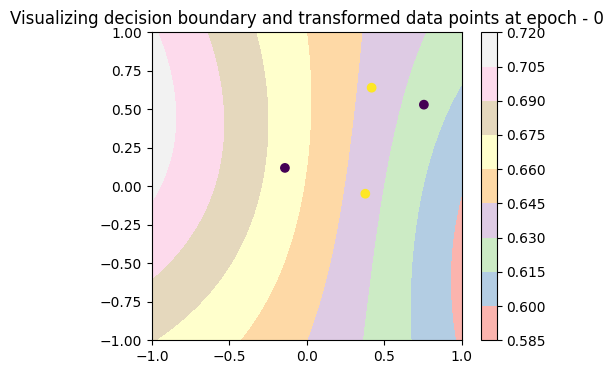

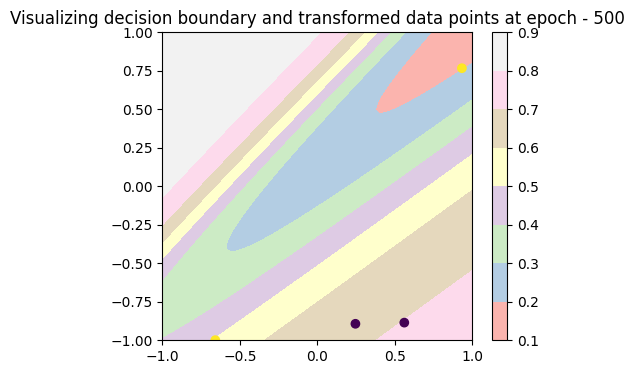

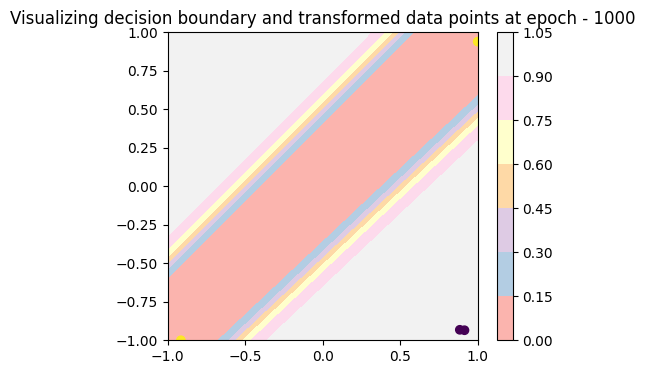

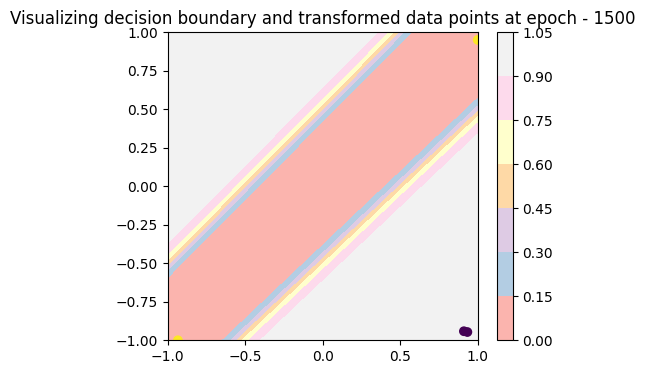

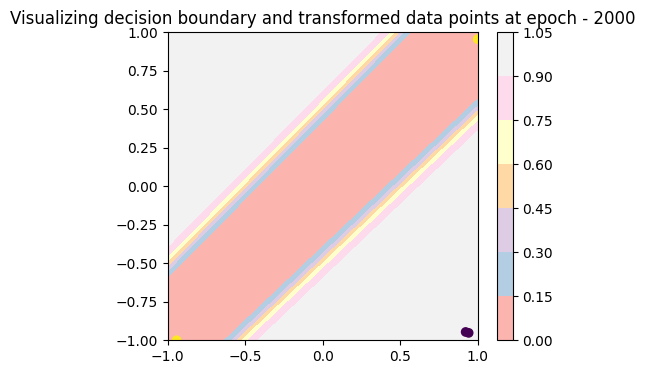

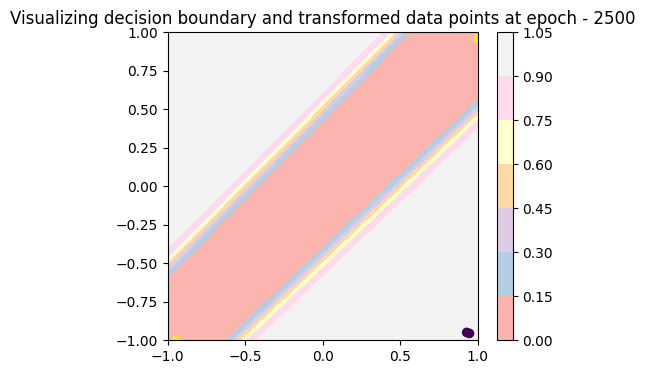

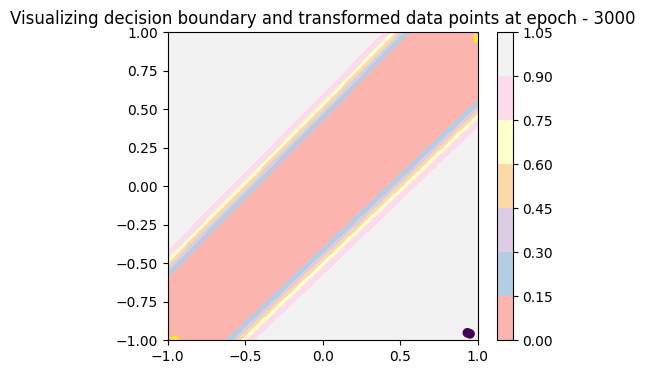

In [9]:
import torch.optim as optim
"""
torch.manual_seed(42)

# Make your dataset here
data = torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype = torch.float32)
labels = torch.tensor([[0],[1],[1],[0]],dtype = torch.float32)

# weights and biases will be initialized automatically by nn
"""
# Make your network here
class XOR(nn.Module):
  def __init__(self):
    super(XOR,self).__init__()
    self.linear1 = nn.Linear(2,2)
    self.linear2 = nn.Linear(2,1)

  def forward(self,x):
    x = self.linear1(x)
    x = torch.tanh(x)
    x = self.linear2(x)
    x = torch.sigmoid(x)
    return x

  def loss(self, y_pred, y_true):
    loss = -torch.sum(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
    return loss

"""
network = XOR()
#define optimizer
optimizer = optim.SGD(network.parameters(), lr=0.1)
epochs = 3001
steps = torch.arange(0,3001,500).tolist()


# Train network
for i in range(epochs):
    #forward propagation
    predictions = network(data)
    loss = network.loss(predictions,labels)
    optimizer.zero_grad()
    #backward propagation
    loss.backward()
    optimizer.step()

    if(i in steps):
      #visualizing
      fig = plt.figure(figsize = (5,4))


      X = torch.linspace(-1,1,100)
      y = torch.linspace(-1,1,100)
      X,y = torch.meshgrid(X,y)
      #we need to make model predict each point of this grid
      model_input = torch.stack([X.reshape(-1),y.reshape(-1)],dim=1) #shape changed to 10000,2
      model_output = network(model_input).reshape(X.shape)

      transformed_data = torch.tanh(network.linear1(data)).detach().numpy() # because plots asked in h1,h2 plane (hidden layer)


      # Plotting decision boundary
      plt.contourf(X,y,model_output.detach().numpy(),cmap = 'Pastel1')
      plt.colorbar()
      plt.scatter(transformed_data[:,0],transformed_data[:,1],c = labels.detach().numpy().flatten(),cmap = 'viridis')
      plt.title(f'Visualizing decision boundary and transformed data points at epoch - {i}')

      plt.show()

"""


3. (5%) What will happen if we don't use an activation function in the hidden layer? Is
the network be able to learn the XOR function? Justify your answer.

* If we don't use an activation function in the hidden layer, the model would not be able to learn the XOR function. This is because the way XOR function works, it cannot be approximated by a linear equation or linear decision boundary. A network without activation function will produce linear input and it is not enough to approximate XOR function

* In our example, we were given tanh function, which allowed the MLP to learn non linear functions and come up witn a non linear hyper plane to segregate the labels.

## Train a Convolutional Neural Network (30%)
In this part you will be asked to train a convolutional neural network on the MNIST
dataset.

1. (10%) Build a Convolutional Neural Network with architecture as shown below:

| Layers | Hyper-parameters |
| :--- | :--- |
| Covolution 1 | Kernel size $= (5, 5, 32)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 1 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Covolution 2 | Kernel size $= (5, 5, 32)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 2 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Covolution 3 | Kernel size $= (5, 5, 64)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 3 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Fully Connected 1 | Output channels $= 64$. Followed by BatchNorm and ReLU. |
| Fully Connected 2 | Output channels $= 10$. Followed by Softmax. |

In [10]:
# CUDA for PyTorch
"""
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
"""
# Create your network here (do not change this name)
class DigitClassification(torch.nn.Module):
    def __init__(self):
      super(DigitClassification, self).__init__()
      self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding='same')
      self.bn1 = nn.BatchNorm2d(32)
      self.relu1 = nn.ReLU()
      self.pool1 = nn.AvgPool2d(kernel_size = 2, stride = 2, padding = 0)

      self.conv2 = nn.Conv2d(32,32,kernel_size = 5, padding = 'same')
      self.bn2 = nn.BatchNorm2d(32)
      self.relu2 = nn.ReLU()
      self.pool2 = nn.AvgPool2d(kernel_size = 2, stride = 2, padding = 0)

      self.conv3 = nn.Conv2d(32,64,kernel_size = 5, padding = 'same')
      self.bn3 = nn.BatchNorm2d(64)
      self.relu3 = nn.ReLU()
      self.pool3   = nn.AvgPool2d(kernel_size = 2, stride = 2, padding = 0)

      self.linear1 = nn.Linear(576,64)
      self.bn4 = nn.BatchNorm1d(64)
      self.relu4 = nn.ReLU()

      self.linear2 = nn.Linear(64,10)
      #we dont apply softmax because entropyloss has inbuilt softmax



    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)

        x = x.view(x.size(0), -1) #flatten

        x = self.linear1(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.linear2(x)

        return x

# Instantiate your network here
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
model = DigitClassification().to(device)


In [11]:
model

DigitClassification(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (linear1): Linear(in_features=576, out_features=64, bias=True)
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (linear2): Linear(in_features=64, out_features=10, bias=True)
)

2. (15%) Train the CNN on the MNIST dataset using the Cross Entropy loss. Report training and testing curves. Your model should reach $99\%$ accuracy on the
test dataset. (Hint: Normalize the images in the $(-1,1)$ range and use the Adam
optimizer).

100%|██████████| 9912422/9912422 [00:00<00:00, 270883303.87it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 91630630.73it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 85159539.92it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17837573.75it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Training Accuracies[97.20166666666667, 98.7, 98.91833333333334, 99.10833333333333, 99.19, 99.25833333333334, 99.39, 99.36166666666666, 99.39166666666667, 99.55333333333334]
Training Losses[0.09431090027809755, 0.04300777170789003, 0.03431500029864474, 0.028365747949385494, 0.025766559076976208, 0.023862722916882916, 0.020064776674790646, 0.020027469978238996, 0.01769266635612152, 0.014363817745849366]
Test Accuracies[98.78, 98.74000000000001, 98.76, 98.87, 99.08, 98.24000000000001, 99.27, 98.65, 99.2, 99.26]
Test Losses[0.03616089534213185, 0.03801055647363103, 0.039935540978850166, 0.03680351878750689, 0.028734547280518125, 0.055940615729715044, 0.023553654663565057, 0.04595592107146847, 0.030782331946081348, 0.024987722177962253]


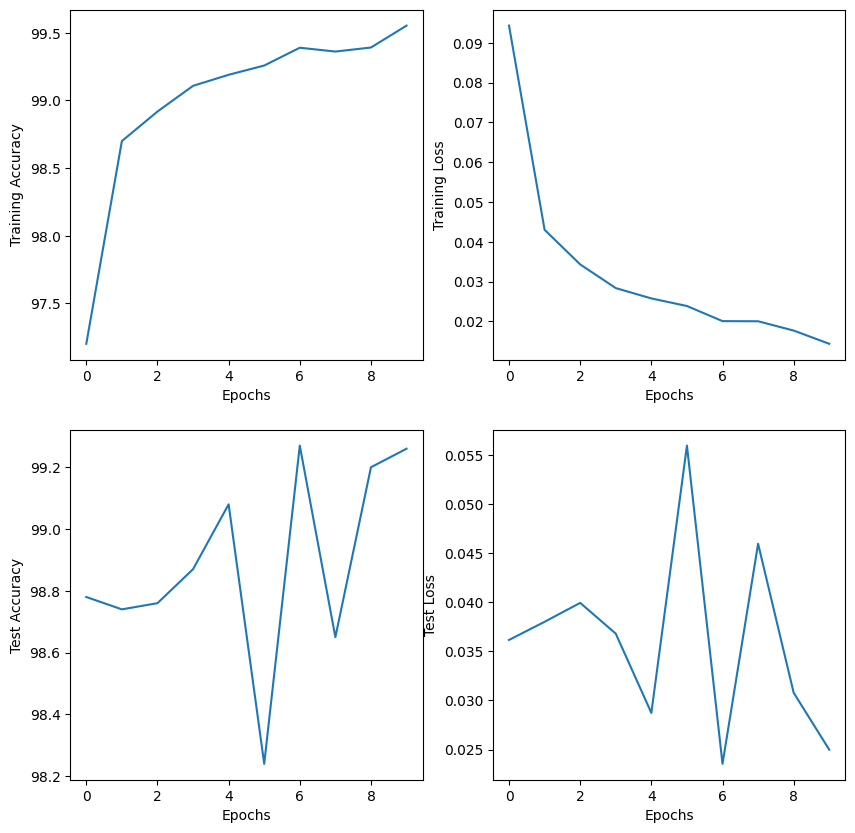

In [12]:
def train():
  # Where your trained model will be saved (and where the autograder will load it)
  model_path = 'model.pth'

  #before loading data, we can setup a transform to normalize data while downloading
  tr = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])

  train_dataset = torchvision.datasets.MNIST(root='./data',train=True,download=True,transform= tr)
  test_dataset = torchvision.datasets.MNIST(root='./data',train=False,download=True,transform= tr)

  train_dataloader = torch.utils.data.DataLoader(train_dataset,batch_size = 64, shuffle =True)
  test_dataloader = torch.utils.data.DataLoader(test_dataset,batch_size = 64, shuffle =True)

  optimizer = optim.Adam(model.parameters(),lr = 0.01)
  criterion = nn.CrossEntropyLoss()

  training_acc =[]
  test_acc = []
  training_loss = []
  test_loss = []



  # Train your network here
  num_epochs = 10
  for epoch in range(num_epochs):
    print("Epoch %d/%d" % (epoch+1, num_epochs))
    runningloss = 0.0
    correct = 0
    total = 0

    for data, labels in train_dataloader:
      data, labels = data.to(device), labels.to(device)
      output = model(data)
      loss = criterion(output, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      runningloss += loss.item()
      #Finding out training accuracy
      index,prediction = torch.max(output,1)
      total += labels.size(0)
      correct += (labels == prediction).sum().item()

    accuracy = (correct/total)*100
    training_acc.append(accuracy)
    training_loss.append(runningloss/len(train_dataloader))

    #Testing set
    runningloss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
      for data, labels in test_dataloader:
        data, labels = data.to(device),labels.to(device)

        output = model(data)
        loss = criterion(output, labels)
        runningloss += loss.item()
        index, prediction = torch.max(output,1)
        total += labels.size(0)
        correct += (prediction==labels).sum().item()

      accuracy = 100 * (correct/total)
      test_acc.append(accuracy)
      test_loss.append(runningloss/len(test_dataloader))

  print("Training Accuracies" + str(training_acc))
  print("Training Losses" + str(training_loss))
  print("Test Accuracies" + str(test_acc))
  print("Test Losses" + str(test_loss))

  #plot curves
  fig,axs = plt.subplots(2,2,figsize = (10,10))
  axs[0,0].plot(range(num_epochs), training_acc)
  axs[0,1].plot(range(num_epochs), training_loss)
  axs[1,0].plot(range(num_epochs), test_acc)
  axs[1,1].plot(range(num_epochs), test_loss)
  axs[0,0].set_xlabel("Epochs")
  axs[0,0].set_ylabel("Training Accuracy")
  axs[0,1].set_xlabel("Epochs")
  axs[0,1].set_ylabel("Training Loss")
  axs[1,0].set_xlabel("Epochs")
  axs[1,0].set_ylabel("Test Accuracy")
  axs[1,1].set_xlabel("Epochs")
  axs[1,1].set_ylabel("Test Loss")
  plt.show()

  torch.save(model.state_dict(), 'model.pth')


SUBMISSION = True # change it to True on submission
# do not attempt to run training on grade scope submission
# you can also comment out this whole block
if SUBMISSION == False:
  train()
else:
  pass

3. (5%) Report the training and testing curves and briefly summarise your implementation and training. Some things you may considering discussing, if appropriate:
 * Summarize your selection of hyperparameters.
 * Describe any issues or challenges you had with your implementation.
 * Note any interesting observations you made.
 * Justify any modifications or additions to the suggested architecture.
 * Do you think that the model overfit, underfit, or neither?

 You do not need to include all of these points and are free to discuss anything else you deem relevant.

1. **I executed my architecure on MNIST dataset with the following hyper parameters :**
* learning rate = 0.01
* optimizer = Adam
* Batch Size = 64
* No of epochs = 10

  I used normalization to bring the data values to the range [-1,1]

2. **Challenges :**
* Choice of learning rate was a challenge. I tried learning rate of 0.05 and 0.01 and observed better results with 0.01. I could have tried with even smaller learning rates.
* Initially I was using softmax at the end of my architecture only to realize that cross entropy loss automatically uses softmax. Thus modifying my architechture(removing softmax from my architecture) helped me improve my accuracy by 3-4%

3. **Observations :**
* Over 10 epochs, Training accuracy increases to 99.5%
* Over 10 epochs, training loss decreases to 0.08
* Over 10 epochs, Testing accuracy is about 99.1%
* Over 10 epochs, testing loss is about 0.03
* The accuracies and losses observed implies that model is performing well

4. **Architecture Change**
* I can experiment by adding dropout layers and training my model for more than 10 epochs to avoid overfitting in that case
* Usage of different activation functions like Leaky Relu is an option
* I can experiment with MaxPooling rather than AveragePooling
* Experimentation with number of filters, filter size is possible

5. **Overfit/Underft/Neither :**
* When I used more epochs for training my model the model was definitely overfitting (increasing test loss). But with 10 epochs, I think the model is performing just well (Neither overfitting nor underfitting). This is because the test accuracies and test loss are very close to train accuracies and loss. Althought there is an increase in loss in the test set, but that is very minimal (the scale on y axis is very small)





## Submission

Make sure you have run all cells in your notebook in order before you zip together your submission, so that all images/graphs appear in the output.

Please submit a pdf file alongside with the notebook, in colab, you can use "File -> Print (Ctrl+P)".

Your submission should include two files: this notebook and your trained model weights.

Please do not run the training loop in gradescope submission.

**Please save before exporting!**